In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score
    
)
from sklearn.model_selection import GridSearchCV

In [3]:
data=pd.read_csv('data_pivotedCPI.csv')

In [4]:
data.head(14)

,Year,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
0,2006,83.72098,74.10746,85.15321,89.32584,87.60902,92.44123,86.36923,71.46426,74.85378,84.32584,85.81917,88.39153,83.96000,86.46117
1,2007,85.53651,78.99954,87.29113,90.65500,89.62257,96.96819,87.94956,78.67714,79.14828,86.27583,87.20417,90.56063,87.03083,88.87067
2,2008,88.28732,87.18575,90.84034,93.20500,91.97820,100.90540,90.89397,90.79524,87.79592,89.21083,89.37250,92.90480,91.94583,92.49245
3,2009,88.73433,87.11739,90.84034,93.28667,92.26585,96.38674,91.59818,94.00404,91.70551,89.53917,90.43584,92.12856,92.71750,92.22625
4,2010,90.34355,89.70656,91.91602,94.71500,93.28429,95.49796,92.99553,92.98444,92.91531,91.57500,91.58916,93.42072,94.38750,93.88620
5,2011,93.31277,94.17565,95.05661,96.71500,95.22010,97.94003,95.58140,97.04855,96.75297,94.69833,93.73333,96.83339,96.08916,96.88689
6,2012,95.63223,97.87996,97.72611,98.60500,97.13258,99.60130,98.48837,99.23970,99.74261,97.22000,96.03500,99.51891,98.58500,99.25687
7,2013,97.54502,100.60160,99.17079,99.45667,98.59416,100.10800,99.68993,99.21047,100.78740,98.90583,98.44250,99.79201,100.32920,100.65500
8,2014,99.11140,100.49480,100.20340,99.96167,99.48821,100.29070,99.93023,99.82607,100.89200,99.52750,99.40334,99.51443,100.52920,100.50290
9,2015,100.00000,100.00000,99.99500,99.99917,100.00000,100.00000,99.96899,100.00000,99.99999,100.00000,100.00000,100.00000,100.00080,100.00000


In [5]:
data_noyear = data.drop('Year', axis=1)

In [6]:
data_noyear.head(14)

,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
0,83.72098,74.10746,85.15321,89.32584,87.60902,92.44123,86.36923,71.46426,74.85378,84.32584,85.81917,88.39153,83.96000,86.46117
1,85.53651,78.99954,87.29113,90.65500,89.62257,96.96819,87.94956,78.67714,79.14828,86.27583,87.20417,90.56063,87.03083,88.87067
2,88.28732,87.18575,90.84034,93.20500,91.97820,100.90540,90.89397,90.79524,87.79592,89.21083,89.37250,92.90480,91.94583,92.49245
3,88.73433,87.11739,90.84034,93.28667,92.26585,96.38674,91.59818,94.00404,91.70551,89.53917,90.43584,92.12856,92.71750,92.22625
4,90.34355,89.70656,91.91602,94.71500,93.28429,95.49796,92.99553,92.98444,92.91531,91.57500,91.58916,93.42072,94.38750,93.88620
5,93.31277,94.17565,95.05661,96.71500,95.22010,97.94003,95.58140,97.04855,96.75297,94.69833,93.73333,96.83339,96.08916,96.88689
6,95.63223,97.87996,97.72611,98.60500,97.13258,99.60130,98.48837,99.23970,99.74261,97.22000,96.03500,99.51891,98.58500,99.25687
7,97.54502,100.60160,99.17079,99.45667,98.59416,100.10800,99.68993,99.21047,100.78740,98.90583,98.44250,99.79201,100.32920,100.65500
8,99.11140,100.49480,100.20340,99.96167,99.48821,100.29070,99.93023,99.82607,100.89200,99.52750,99.40334,99.51443,100.52920,100.50290
9,100.00000,100.00000,99.99500,99.99917,100.00000,100.00000,99.96899,100.00000,99.99999,100.00000,100.00000,100.00000,100.00080,100.00000


In [7]:
data_backforwardfilled=data_noyear.bfill()
data_backforwardfilled

,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
0,83.72098,74.10746,85.15321,89.32584,87.60902,92.44123,86.36923,71.46426,74.85378,84.32584,85.81917,88.39153,83.96000,86.46117
1,85.53651,78.99954,87.29113,90.65500,89.62257,96.96819,87.94956,78.67714,79.14828,86.27583,87.20417,90.56063,87.03083,88.87067
2,88.28732,87.18575,90.84034,93.20500,91.97820,100.90540,90.89397,90.79524,87.79592,89.21083,89.37250,92.90480,91.94583,92.49245
3,88.73433,87.11739,90.84034,93.28667,92.26585,96.38674,91.59818,94.00404,91.70551,89.53917,90.43584,92.12856,92.71750,92.22625
4,90.34355,89.70656,91.91602,94.71500,93.28429,95.49796,92.99553,92.98444,92.91531,91.57500,91.58916,93.42072,94.38750,93.88620
5,93.31277,94.17565,95.05661,96.71500,95.22010,97.94003,95.58140,97.04855,96.75297,94.69833,93.73333,96.83339,96.08916,96.88689
6,95.63223,97.87996,97.72611,98.60500,97.13258,99.60130,98.48837,99.23970,99.74261,97.22000,96.03500,99.51891,98.58500,99.25687
7,97.54502,100.60160,99.17079,99.45667,98.59416,100.10800,99.68993,99.21047,100.78740,98.90583,98.44250,99.79201,100.32920,100.65500
8,99.11140,100.49480,100.20340,99.96167,99.48821,100.29070,99.93023,99.82607,100.89200,99.52750,99.40334,99.51443,100.52920,100.50290
9,100.00000,100.00000,99.99500,99.99917,100.00000,100.00000,99.96899,100.00000,99.99999,100.00000,100.00000,100.00000,100.00080,100.00000


In [8]:
data_interpolate=data_noyear.interpolate()
data_interpolate

,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
0,83.72098,74.10746,85.15321,89.32584,87.60902,92.44123,86.36923,71.46426,74.85378,84.32584,85.81917,88.39153,83.96000,86.46117
1,85.53651,78.99954,87.29113,90.65500,89.62257,96.96819,87.94956,78.67714,79.14828,86.27583,87.20417,90.56063,87.03083,88.87067
2,88.28732,87.18575,90.84034,93.20500,91.97820,100.90540,90.89397,90.79524,87.79592,89.21083,89.37250,92.90480,91.94583,92.49245
3,88.73433,87.11739,90.84034,93.28667,92.26585,96.38674,91.59818,94.00404,91.70551,89.53917,90.43584,92.12856,92.71750,92.22625
4,90.34355,89.70656,91.91602,94.71500,93.28429,95.49796,92.99553,92.98444,92.91531,91.57500,91.58916,93.42072,94.38750,93.88620
5,93.31277,94.17565,95.05661,96.71500,95.22010,97.94003,95.58140,97.04855,96.75297,94.69833,93.73333,96.83339,96.08916,96.88689
6,95.63223,97.87996,97.72611,98.60500,97.13258,99.60130,98.48837,99.23970,99.74261,97.22000,96.03500,99.51891,98.58500,99.25687
7,97.54502,100.60160,99.17079,99.45667,98.59416,100.10800,99.68993,99.21047,100.78740,98.90583,98.44250,99.79201,100.32920,100.65500
8,99.11140,100.49480,100.20340,99.96167,99.48821,100.29070,99.93023,99.82607,100.89200,99.52750,99.40334,99.51443,100.52920,100.50290
9,100.00000,100.00000,99.99500,99.99917,100.00000,100.00000,99.96899,100.00000,99.99999,100.00000,100.00000,100.00000,100.00080,100.00000


In [9]:
data_noyear.describe()

,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
count,14.000000,14.000000,15.000000,14.000000,14.000000,13.000000,13.000000,15.000000,14.000000,14.000000,15.000000,14.000000,14.000000,14.000000
mean,95.558179,95.049151,96.577250,97.474766,96.910491,98.564281,95.899261,96.647254,96.260162,95.898095,96.743894,97.285756,96.775004,97.172614
std,7.366831,10.372398,5.970683,4.584029,5.381867,2.565769,5.347697,10.268302,10.113843,6.671790,6.802641,4.893751,6.088506,5.497028
min,83.720980,74.107460,85.153210,89.325840,87.609020,92.441230,86.369230,71.464260,74.853780,84.325840,85.819170,88.391530,83.960000,86.461170
25%,89.136635,87.815953,91.378180,93.643753,92.520460,96.968190,91.598180,93.494240,92.007960,90.048127,91.012500,93.033780,93.135000,92.840888
50%,96.588625,98.939980,99.170790,99.030835,97.863370,100.000000,98.488370,99.239700,99.871300,98.062915,98.442500,99.516670,99.265415,99.527135
75%,100.668700,100.574900,100.730000,100.136668,100.368775,100.290700,99.930230,101.607850,100.902125,100.218100,101.009600,100.455550,100.479200,100.616975
max,106.657800,109.569700,103.550800,104.232500,105.275900,100.905400,102.250000,108.896900,109.995100,105.391700,107.510000,103.346100,104.818300,104.177500


EURO_COUNTRIES = ['Austria', 'Estonia', 'Finland', 'France', 'Germany', 'Ireland','Italy', 'Latvia','Lithuania','Luxembourg', 'Netherlands', 'Portugal','Slovenia','Spain']

In [10]:
data_backfilled_missingdropped=data_backforwardfilled.dropna()

In [11]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Austria'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -1.81
Critial Values:
   1%, -4.67
Critial Values:
   5%, -3.37
Critial Values:
   10%, -2.80

p-value: 0.38
Stationary


In [12]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Estonia'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -2.85
Critial Values:
   1%, -4.67
Critial Values:
   5%, -3.37
Critial Values:
   10%, -2.80

p-value: 0.05
Stationary


In [13]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Finland'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -3.01
Critial Values:
   1%, -4.67
Critial Values:
   5%, -3.37
Critial Values:
   10%, -2.80

p-value: 0.03
Non-Stationary


In [14]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['France'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -0.56
Critial Values:
   1%, -4.33
Critial Values:
   5%, -3.23
Critial Values:
   10%, -2.75

p-value: 0.88
Stationary


In [15]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Germany'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -1.76
Critial Values:
   1%, -4.67
Critial Values:
   5%, -3.37
Critial Values:
   10%, -2.80

p-value: 0.40
Stationary


In [16]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Ireland'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -0.98
Critial Values:
   1%, -4.67
Critial Values:
   5%, -3.37
Critial Values:
   10%, -2.80

p-value: 0.76
Stationary


In [17]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Italy'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -3.99
Critial Values:
   1%, -4.47
Critial Values:
   5%, -3.29
Critial Values:
   10%, -2.77

p-value: 0.00
Non-Stationary


In [18]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Spain'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -2.92
Critial Values:
   1%, -4.67
Critial Values:
   5%, -3.37
Critial Values:
   10%, -2.80

p-value: 0.04
Non-Stationary


In [19]:
len(data_backfilled_missingdropped['Spain'])
#14 countries, 13 rows, 182 variables

13

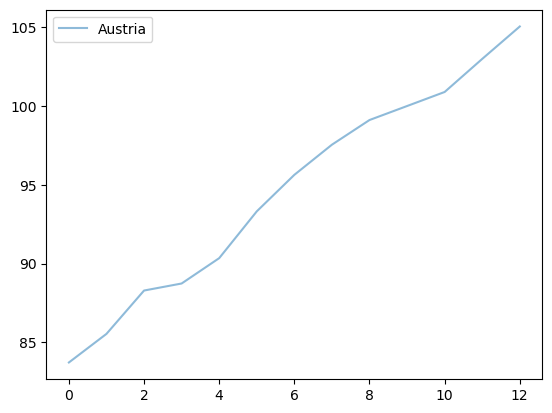

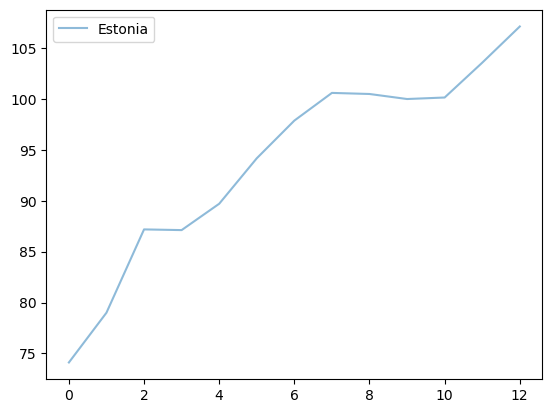

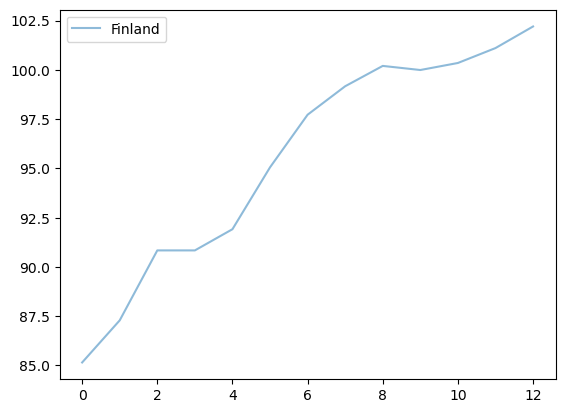

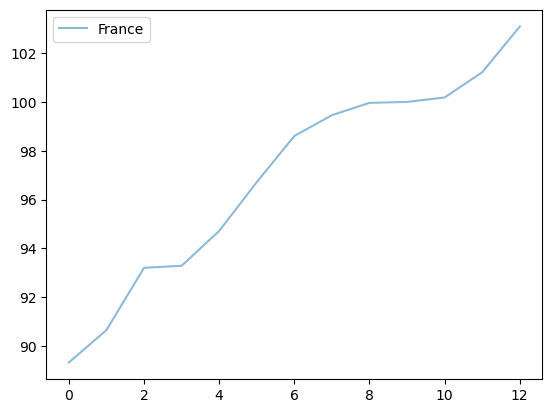

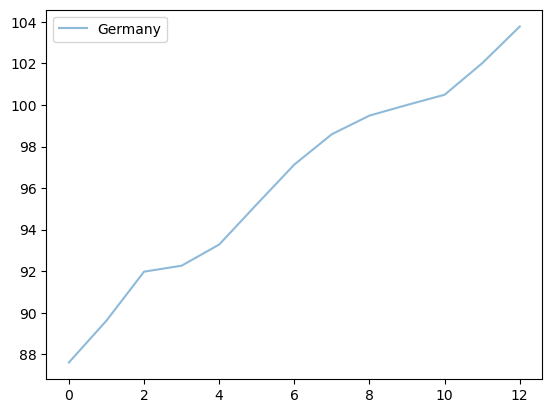

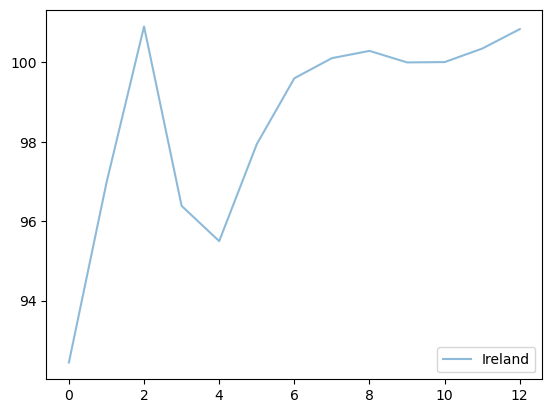

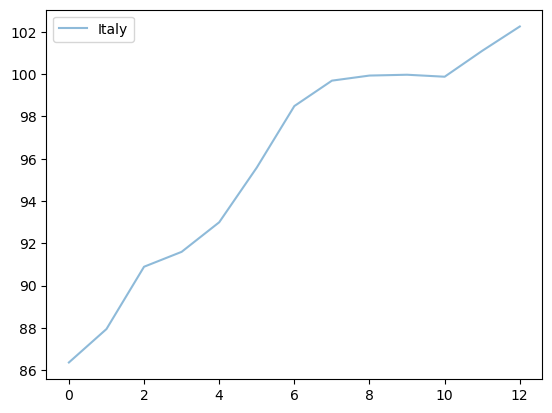

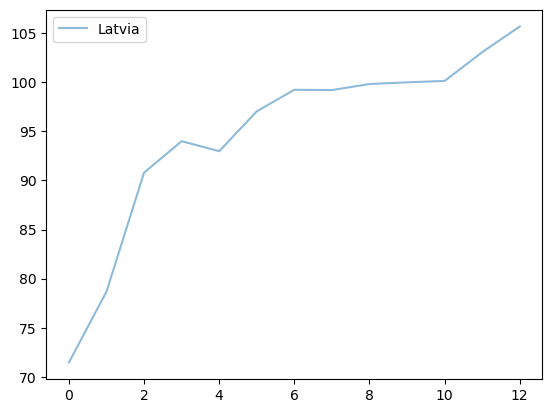

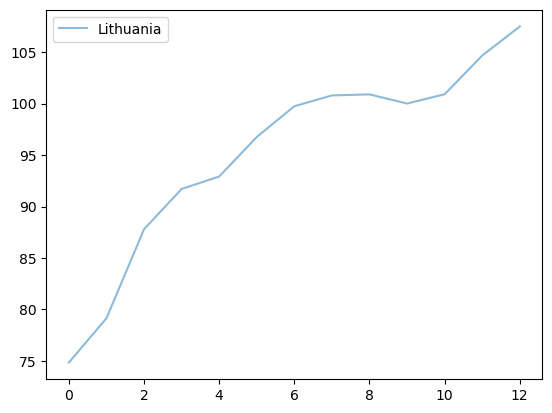

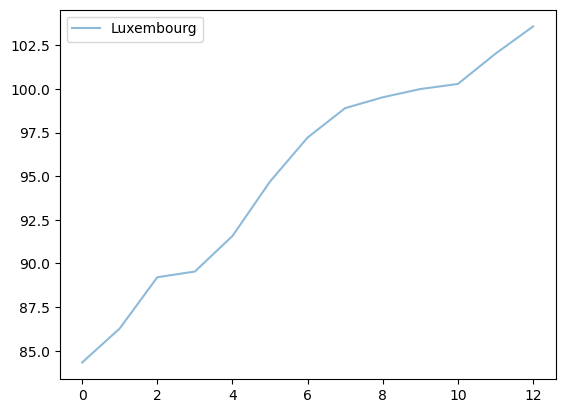

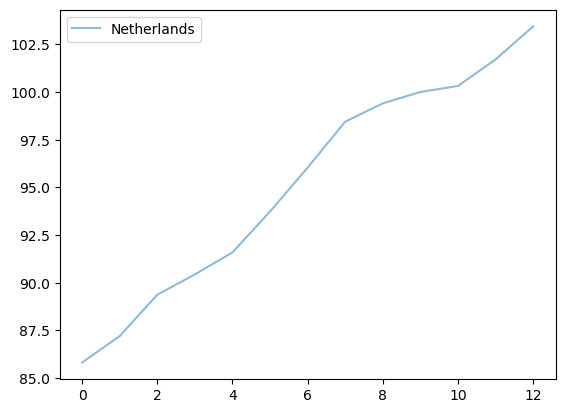

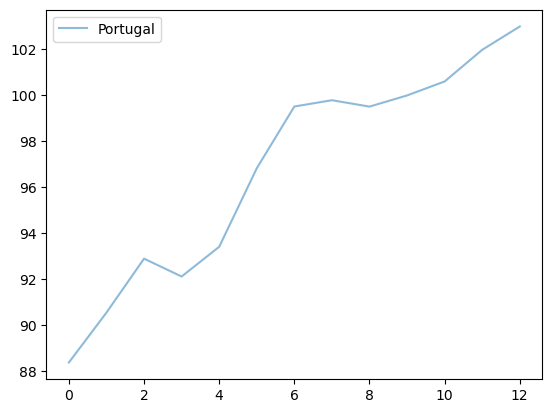

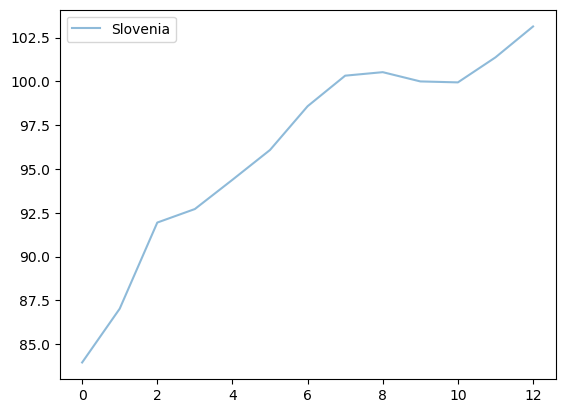

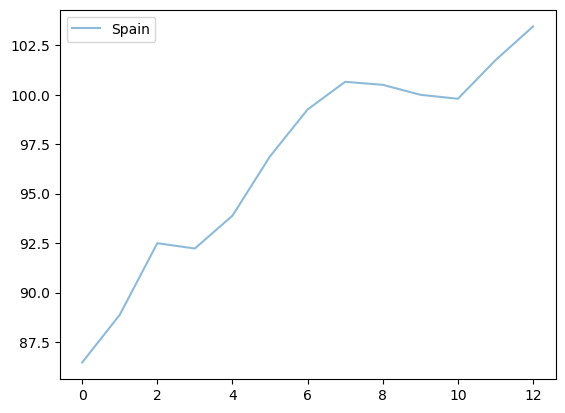

In [20]:
data_backfilled_missingdropped[['Austria']].plot(alpha=0.5);
data_backfilled_missingdropped[['Estonia']].plot(alpha=0.5);
data_backfilled_missingdropped[['Finland']].plot(alpha=0.5);
data_backfilled_missingdropped[['France']].plot(alpha=0.5);
data_backfilled_missingdropped[['Germany']].plot(alpha=0.5);
data_backfilled_missingdropped[['Ireland']].plot(alpha=0.5);
data_backfilled_missingdropped[['Italy']].plot(alpha=0.5);
data_backfilled_missingdropped[['Latvia']].plot(alpha=0.5);
data_backfilled_missingdropped[['Lithuania']].plot(alpha=0.5);
data_backfilled_missingdropped[['Luxembourg']].plot(alpha=0.5);
data_backfilled_missingdropped[['Netherlands']].plot(alpha=0.5);
data_backfilled_missingdropped[['Portugal']].plot(alpha=0.5);
data_backfilled_missingdropped[['Slovenia']].plot(alpha=0.5);
data_backfilled_missingdropped[['Spain']].plot(alpha=0.5);